In [1]:
from os import listdir
from os.path import isfile, join

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
mpl.style.use('default')

from sympy import *
from api.color_scheme import *

save_plot = True

random_state = 0
random.seed(random_state)
np.random.seed(random_state)

In [2]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]
random.shuffle(res_files)

In [3]:
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin']
np_lib = ['exp', 'log', 'sqrt', 'tanh', 'sin']

v = symbols('v')

Simplified Symbolic Function: -0.6383103132*tanh(0.989440023899078*x_1 + 0.976000011) - 0.165729474991769
Simplified Symbolic Function: -0.7120596766*tanh(1.1483198404*x_1 + 1.0639199018) - 0.199753754938798
Simplified Symbolic Function: -0.7811487913*tanh(1.0078399181*x_1 + 1.3096796274) - 0.0613519467427117
Simplified Symbolic Function: -0.6338096857*tanh(1.1490398645*x_1 + 1.0909599066) - 0.212704858296192
Simplified Symbolic Function: -0.6407601237*tanh(1.1159999371*x_1 + 0.8789598346) - 0.273424507540424
Simplified Symbolic Function: -0.8336694241*tanh(0.8503198028*x_1 + 1.0508799553) - 0.0383847978039188
Simplified Symbolic Function: -0.628716289997101*tanh(1.2143998146*x_1 + 1.2990397215) - 0.100388226946472
Simplified Symbolic Function: -0.6082229018*tanh(1.3747996092*x_1 + 1.2154397964) - 0.353157438925194
Simplified Symbolic Function: 0.755845188870392 - 1.5967543125*tanh(0.4940795302*x_1 + 1.1047198772)
Simplified Symbolic Function: -0.6864551306*tanh(1.0437599421*x_1 + 1.09

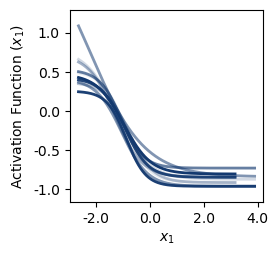

Simplified Symbolic Function: -1.269469738*sin(0.6253599524*x_2 - 3.3819198608) - 0.343150852315554
Simplified Symbolic Function: 1.299239397*sin(0.6024799347*x_2 - 6.6017599106) - 0.353319371817122
Simplified Symbolic Function: 1.3855862617*sin(0.5831198692*x_2 - 6.4191198348999) - 0.548646809390296
Simplified Symbolic Function: 1.3575248718*sin(0.6525599957*x_2 - 0.3586396575) - 0.241503559040643
Simplified Symbolic Function: 0.298449241601391 - 1.9348493814*sin(0.4558395743*x_2 + 8.8669605255)
Simplified Symbolic Function: 1.7706305981*sin(0.433999598*x_2 - 6.5460801125) - 0.230291727019916
Simplified Symbolic Function: 1.5103491545*sin(0.5435198545*x_2 - 6.6684799194) - 0.0743742675396434
Simplified Symbolic Function: 1.3372352123*sin(0.5921598673*x_2 + 5.9996795654) - 0.488977380764393
Simplified Symbolic Function: -1.3289752007*sin(0.515119791*x_2 + 9.3299198151) - 0.399176829090014
Simplified Symbolic Function: -1.3446885347*sin(0.6058399081*x_2 + 9.2006397247) - 0.5248076255045

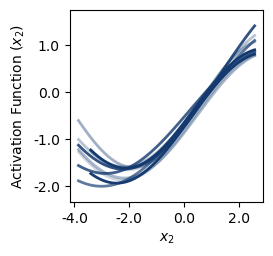

Simplified Symbolic Function: -0.0092806442*(x_3 + 0.7027095348)**4 - 0.643047616945511
Simplified Symbolic Function: -0.0004171649*exp(4.4449601173*x_3) - 0.75984114198761
Simplified Symbolic Function: -0.027645127*exp(1.5211194754*x_3) - 0.708771173848374
Simplified Symbolic Function: -6.6555e-6*exp(9.9996995926*x_3) - 0.717989175436836
Simplified Symbolic Function: -0.0061271768*(0.845767758*x_3 + 1)**4 - 0.719608520539033
Simplified Symbolic Function: -0.0001032228*exp(7.274720192*x_3) - 0.690334639727379
Simplified Symbolic Function: -1.9214e-5*exp(8.4452800751*x_3) - 0.641992848581385
Simplified Symbolic Function: -5.959e-7*exp(9.8920001984*x_3) - 0.863032438269086
Simplified Symbolic Function: -3.937e-5*exp(7.53632020950317*x_3) - 0.525012611719622
Simplified Symbolic Function: -8.3165e-6*exp(9.5034399033*x_3) - 0.823678169537188


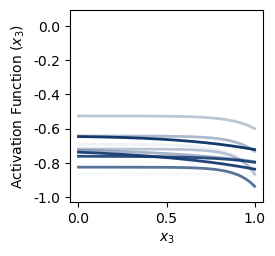

Simplified Symbolic Function: 0.0236801517*exp(3.0711197853*x_4) - 0.668990752776417
Simplified Symbolic Function: 0.0513339432*(x_4 + 0.7426440567)**4 - 0.775872784699419
Simplified Symbolic Function: 0.3039264072*(x_4 + 0.1441907799)**4 - 0.73654767756374
Simplified Symbolic Function: 0.0020452878*exp(5.5*x_4) - 0.720041118736836
Simplified Symbolic Function: 0.112143779*(0.5357787921*x_4 + 1)**4 - 0.837879476339032
Simplified Symbolic Function: -0.120095862927379 - 0.5703419996*exp(-4.2399997711*x_4)
Simplified Symbolic Function: 0.2000318532*(x_4 + 0.2684887481)**4 - 0.643051512376654
Simplified Symbolic Function: 0.0838011524*(x_4 + 0.9897301415)**3 - 0.944278733388039
Simplified Symbolic Function: 0.0010161748*exp(6.2684798241*x_4) - 0.526068156519622
Simplified Symbolic Function: 0.1055693005*(0.6188098477*x_4 + 1)**4 - 0.929255786537188


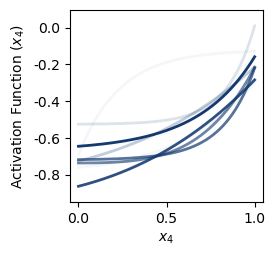

Simplified Symbolic Function: 0.0274366724*(0.808510661*x_5 + 1)**4 - 0.672747273476417
Simplified Symbolic Function: 0.0001612026*exp(7.3815999031*x_5) - 0.76041950948761
Simplified Symbolic Function: 6.42907e-5*exp(8.3378400803*x_5) - 0.736480591548374
Simplified Symbolic Function: 0.0036349323*exp(4.07200002670288*x_5) - 0.721630763236836
Simplified Symbolic Function: 0.0259757123*(0.9139970402*x_5 + 1)**4 - 0.751711409639033
Simplified Symbolic Function: 0.1205580109*(x_5 + 0.4078774933)**4 - 0.693774546230922
Simplified Symbolic Function: 0.000725796*exp(5.9693598747*x_5) - 0.642737858581385
Simplified Symbolic Function: 0.0017722566*exp(5.3267202377*x_5) - 0.864805290769086
Simplified Symbolic Function: 0.0005800938*exp(6.41751956939697*x_5) - 0.525632075519622
Simplified Symbolic Function: 0.0498081052*exp(2.120880127*x_5) - 0.873494591237188


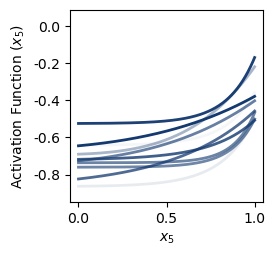

Simplified Symbolic Function: 0.004312156*exp(5.3148803711*x_6) - 0.649622757076417
Simplified Symbolic Function: 0.0623473258*(x_6 + 0.8544030766)**4 - 0.793483617107491
Simplified Symbolic Function: 0.1145229319*exp(2.0140800476*x_6) - 0.850939232748374
Simplified Symbolic Function: 0.0015555332*exp(6.2611198425*x_6) - 0.719551364136836
Simplified Symbolic Function: 0.0005876333*exp(7.0745601654*x_6) - 0.726323330639033
Simplified Symbolic Function: 0.383994634672621 - 1.0744324972*exp(-2.9799199104*x_6)
Simplified Symbolic Function: 0.0078834502*exp(4.3559999466*x_6) - 0.649895512781385
Simplified Symbolic Function: 0.0745018297*(x_6 + 0.7610468029)**4 - 0.888025689629631
Simplified Symbolic Function: 0.0003425338*exp(7.4363999367*x_6) - 0.525394515519622
Simplified Symbolic Function: 0.3027534396*exp(1.2079998255*x_6) - 1.12643992563719


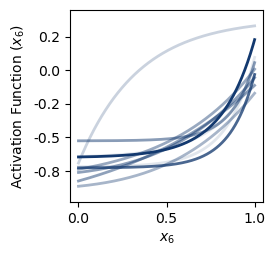

In [4]:
df_summary = {}
data = 'TRACE'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'

df_temp = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, 0), index_col=[0])

col_clean = []  # used to enable single variable in function
for i in range(df_temp.shape[1] - 1, 0, -1):
    col_clean.append('x_{}'.format(i))

col = []  # initialize feature names
for i in range(1, df_temp.shape[1]):
    col.append('x_{}'.format(i))
col.append('pred')

for var in col[:-1]:  # enumerate all feature names
    
    # get min and max of inputs and outputs
    x_lim_lower, x_lim_upper = 0, 0
    y_lim_lower, y_lim_upper = 0, 0
    
    legend_flag = 0  # only legend one of the predicted results
    
    _, ax = plt.subplots(figsize=(2.5,2.5))
    
    for i in res_files:
        
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
            continue  # get only text files with symbolic functions
        
        # get random seed from the file names
        seed = i.split('_')[-1].split('.')[0]
        # get the corresponding symbolic functions
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        try:  # get the corresponding prediction results with the symbolic functions
            df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
        except FileNotFoundError:
            continue  # avoid missing files
        df_pred.columns = col
            
        # print("Symbolic activation function:", res.iloc[-2][0])
        fun_str = res.iloc[-1][0]  # get symbolic functions with 10 digits reserved
        for v in col_clean:
            if v != var:  # set all other variables as 0
                fun_str = fun_str.replace(v, '0')
            else:  # set target feature as variable v
                fun_str = fun_str.replace(v, 'v')
        
        print("Simplified Symbolic Function: {}".format(str(simplify(fun_str)).replace('v', var)))
                
        for l in np_lib:  # replace functions in text with numpy functions
            fun_str = fun_str.replace(l, 'np.{}'.format(l))
        
        # define the symbolic function using simplified strings
        eval(compile('''def fun(v):
            return {}
        '''.format(fun_str), '<string>', 'exec'))

        x_lim_lower, x_lim_upper = (  # update min and max of features
            min(df_pred['{}'.format(var)].min(), x_lim_lower), max(df_pred['{}'.format(var)].max(), x_lim_upper))
        
        # get the smooth symbolic function with grid values
        xs = np.linspace(x_lim_lower, x_lim_upper, 1000)
        fun_pred = [fun(x) for x in xs]
        
        # get label of symbolic functions
        label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if legend_flag == 0 and (data == 'linear' or data == 'non-linear') else None
        # plot the symbolic functions
        sns.lineplot(x=xs, y=fun_pred, linewidth=2, color=AAAI_pal['Main Blue'], alpha=(1 - random.random()) ** legend_flag, label=label)
        
        y_lim_lower, y_lim_upper = (  # update min and max of outputs
            min(min(fun_pred), y_lim_lower), max(max(fun_pred), y_lim_upper))
        
        legend_flag = 1  # only plot the first appearance
        
        df_summary[seed] = df_pred  # store the prediction results
    
    if data == 'linear':
        # get ground truth if with linear or non-linear experiments
        if var == 'x_1':
            df_pred['fun_true_{}'.format(var)] = df_pred[var]
        else:
            df_pred['fun_true_{}'.format(var)] = df_pred[var] * 2
        
        y_lim_lower, y_lim_upper = (
            min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
    
        sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
                     label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
    
    elif data == 'non-linear':
        # get ground truth if with linear or non-linear experiments
        df_pred['fun_true_{}'.format(var)] = np.log(5) * np.exp(-df_pred[var] ** 2 / (2 * 0.5 ** 2))
        
        y_lim_lower, y_lim_upper = (
            min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
    
        sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
                     label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
    
    plt.xlabel('$x_{{{}}}$'.format(var.split('_')[-1]))
    plt.ylabel('Activation Function $(x_{{{}}})$'.format(var.split('_')[-1]))
    if data == 'linear' or data == 'non-linear':
        plt.legend()
    
    marg = min(y_lim_upper, 5) - max(y_lim_lower, -5)
    plt.ylim([max(y_lim_lower, -5) - 0.1 * marg, min(y_lim_upper, 5) + 0.1 * marg])
    # plt.ylim([-0.6, 1.3])
    # plt.xlim([df_pred['{}'.format(var)].min(), df_pred['{}'.format(var)].max()])
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    if save_plot:
        plt.savefig('../fig/func_{}_{}.png'.format(data, var), bbox_inches='tight', dpi=500, transparent=True)
    
    plt.show()

In [5]:
data = 'TRACE'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'
    
for i in res_files:
    
    if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
        continue  # get only text files with symbolic functions
    
    # get random seed from the file names
    seed = i.split('_')[-1].split('.')[0]
    # get the corresponding symbolic functions
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    
    try:  # get the corresponding prediction results with the symbolic functions
        df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
    except FileNotFoundError:
        continue  # avoid missing files
    df_pred.columns = col
    
    # fun_str = res.iloc[-3][0]
    fun_str = res.iloc[-3][0].replace('**', '^').replace('*', '')
    for l in np_lib:  # replace functions in text with numpy functions
        fun_str = fun_str.replace(l, '\\text{{{}}}'.format(l))
    print('$' + fun_str + '$ \\\\')

$-1.3\text{sin}(0.6x_2 - 3.4) - 0.6\text{tanh}(1.0x_1 + 1.0) + 0.1$ \\
$0.1(-x_4 - 0.7)^4 + 0.1(-x_6 - 0.9)^4 + 1.3\text{sin}(0.6x_2 - 6.6) - 0.7\text{tanh}(1.1x_1 + 1.1) + 0.2$ \\
$0.3(-x_4 - 0.1)^4 + 0.1\text{exp}(2.0x_6) + 1.4\text{sin}(0.6x_2 - 6.4) - 0.8\text{tanh}(1.0x_1 + 1.3)$ \\
$1.4\text{sin}(0.7x_2 - 0.4) - 0.6\text{tanh}(1.1x_1 + 1.1) + 0.3$ \\
$0.1(-0.5x_4 - 1)^4 - 1.9\text{sin}(0.5x_2 + 8.9) - 0.6\text{tanh}(1.1x_1 + 0.9) + 0.6$ \\
$0.1(-x_5 - 0.4)^4 + 1.8\text{sin}(0.4x_2 - 6.5) - 0.8\text{tanh}(0.9x_1 + 1.1) + 2.1 - 1.1\text{exp}(-3.0x_6) - 0.6\text{exp}(-4.2x_4)$ \\
$0.2(-x_4 - 0.3)^4 + 1.5\text{sin}(0.5x_2 - 6.7) - 0.6\text{tanh}(1.2x_1 + 1.3) + 0.5$ \\
$0.1(x_4 + 1.0)^3 + 0.1(-x_6 - 0.8)^4 + 1.3\text{sin}(0.6x_2 + 6.0) - 0.6\text{tanh}(1.4x_1 + 1.2) - 0.e-1$ \\
$-1.3\text{sin}(0.5x_2 + 9.3) - 1.6\text{tanh}(0.5x_1 + 1.1) + 0.9$ \\
$0.1(-0.6x_4 - 1)^4 + 0.3\text{exp}(1.2x_6) - 1.3\text{sin}(0.6x_2 + 9.2) - 0.7\text{tanh}(1.0x_1 + 1.1) - 0.4$ \\


In [14]:
for data in ['TRACE', 'colon', 'rdata', 'FRTCS']:
    
    for i in res_files:
        
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data or i.split('_')[-1] != '3.txt':
            continue  # get only text files with symbolic functions
        
        # get the corresponding symbolic functions
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        # fun_str = res.iloc[-3][0]
        fun_str = res.iloc[-3][0].replace('**', '^').replace('*', '')
        for l in np_lib:  # replace functions in text with numpy functions
            fun_str = fun_str.replace(l, '\\text{{{}}}'.format(l))
        print('$' + fun_str + '$ \\\\')

$-1.3\text{sin}(0.5x_2 + 9.3) - 1.6\text{tanh}(0.5x_1 + 1.1) + 0.9$ \\
$0.5\text{tanh}(0.7x_2) + 0.2\text{tanh}(1.4x_1 - 0.6) - 0.2$ \\
$0.1(-x_5 - 0.5)^4 + 1.6\text{tanh}(0.4x_1 + 0.2) - 0.2\text{tanh}(3.9x_2 - 1.1) - 0.3$ \\
$0.6(-x_12 - 0.2)^4 + 0.2(-x_6 - 0.e-1)^2 + 0.2\text{sin}(1.4x_1 + 6.8) - 0.2\text{sin}(1.6x_2 + 5.2) - 0.8\text{sin}(1.2x_4 - 2.6) - 0.2\text{sin}(1.8x_5 - 10.0) - 0.6\text{tanh}(1.2x_3 + 1.3) - 0.5\text{tanh}(2.3x_7 + 2.0) + 0.4\text{tanh}(1.0x_8 + 0.2) - 1.2$ \\
